<a href="https://colab.research.google.com/github/iPrinka/MITx-Micromasters-Statistics-Data-Science/blob/main/dass_mod7_oneleague.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#### Bias/Variance Tradeoff



In [1]:
library(tidyverse)

── Attaching packages ─────────────────────────────────────── tidyverse 1.3.1 ──

✔ ggplot2 3.4.2     ✔ purrr   1.0.1
✔ tibble  3.2.1     ✔ dplyr   1.1.2
✔ tidyr   1.3.0     ✔ stringr 1.5.0
✔ readr   2.1.4     ✔ forcats 1.0.0

── Conflicts ────────────────────────────────────────── tidyverse_conflicts() ──
✖ dplyr::filter() masks stats::filter()
✖ dplyr::lag()    masks stats::lag()



In [20]:
#make synthetic regression data
x <- c(1:100)/10
y <- 3*x^2 - 2*x + 4 + rnorm(100, sd = 10)   # rnorm for noise

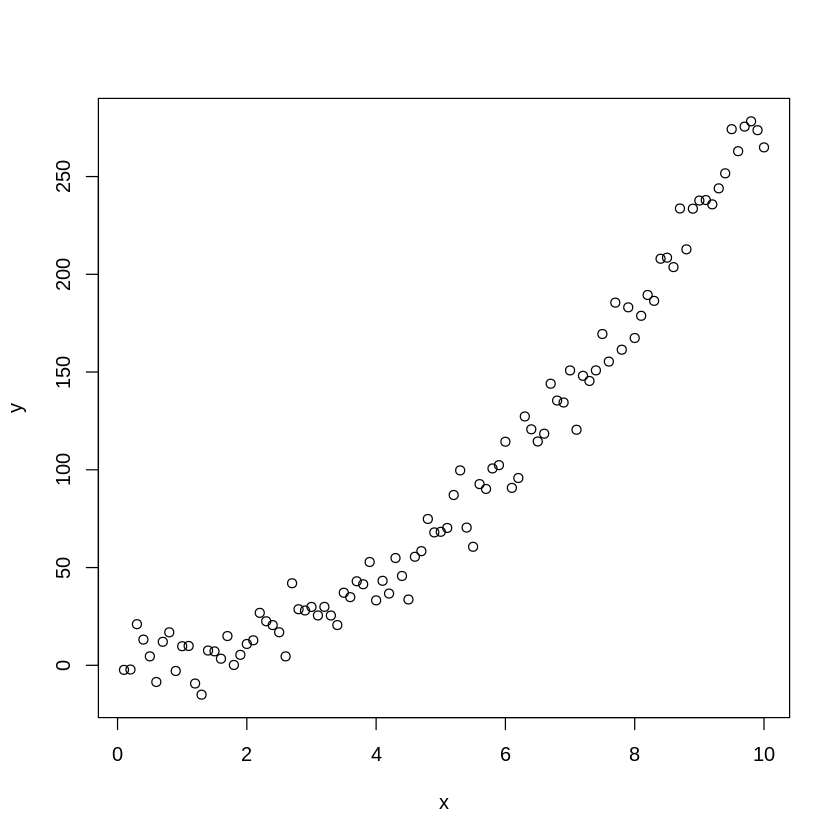

In [21]:
#plot it
plot(x,y)

In [22]:
#build regression model
model1 <- lm(y~x)
summary(model1)


Call:
lm(formula = y ~ x)

Residuals:
   Min     1Q Median     3Q    Max 
-48.35 -18.25  -3.80  15.79  60.56 

Coefficients:
            Estimate Std. Error t value Pr(>|t|)    
(Intercept) -48.0871     4.9976  -9.622 8.01e-16 ***
x            28.5558     0.8592  33.236  < 2e-16 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 24.8 on 98 degrees of freedom
Multiple R-squared:  0.9185,	Adjusted R-squared:  0.9177 
F-statistic:  1105 on 1 and 98 DF,  p-value: < 2.2e-16


In [23]:
yhat <- predict(model1, newdata=data.frame(x))
yhat

1          2          3          4          5          6          7 
-45.231498 -42.375918 -39.520339 -36.664759 -33.809179 -30.953599 -28.098020 
         8          9         10         11         12         13         14 
-25.242440 -22.386860 -19.531280 -16.675701 -13.820121 -10.964541  -8.108961 
        15         16         17         18         19         20         21 
 -5.253382  -2.397802   0.457778   3.313358   6.168938   9.024517  11.880097 
        22         23         24         25         26         27         28 
 14.735677  17.591257  20.446836  23.302416  26.157996  29.013576  31.869155 
        29         30         31         32         33         34         35 
 34.724735  37.580315  40.435895  43.291474  46.147054  49.002634  51.858214 
        36         37         38         39         40         41         42 
 54.713793  57.569373  60.424953  63.280533  66.136112  68.991692  71.847272 
        43         44         45         46         47         48         49 
 74.702852  77.558431  80.414011  83.269591  86.125171  88.980750  91.836330 
        50         51         52         53         54         55         56 
 94.691910  97.547490 100.403069 103.258649 106.114229 108.969809 111.825389 
        57         58         59         60         61         62         63 
114.680968 117.536548 120.392128 123.247708 126.103287 128.958867 131.814447 
        64         65         66         67         68         69         70 
134.670027 137.525606 140.381186 143.236766 146.092346 148.947925 151.803505 
        71         72         73         74         75         76         77 
154.659085 157.514665 160.370244 163.225824 166.081404 168.936984 171.792563 
        78         79         80         81         82         83         84 
174.648143 177.503723 180.359303 183.214882 186.070462 188.926042 191.781622 
        85         86         87         88         89         90         91 
194.637201 197.492781 200.348361 203.203941 206.059521 208.915100 211.770680 
        92         93         94         95         96         97         98 
214.626260 217.481840 220.337419 223.192999 226.048579 228.904159 231.759738 
        99        100 
234.615318 237.470898

In [14]:
install.packages("Metrics")

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)



In [24]:
#evaluate RMSE
library("Metrics")
rmse(y, yhat)

[1] 24.5517

In [29]:
f <- function(x) {
  return (28.5*x - 49.26)
}
plot(x,f(x))

[1] -46.41 -43.56 -40.71 -37.86 -35.01 -32.16 -29.31 -26.46 -23.61 -20.76
 [11] -17.91 -15.06 -12.21  -9.36  -6.51  -3.66  -0.81   2.04   4.89   7.74
 [21]  10.59  13.44  16.29  19.14  21.99  24.84  27.69  30.54  33.39  36.24
 [31]  39.09  41.94  44.79  47.64  50.49  53.34  56.19  59.04  61.89  64.74
 [41]  67.59  70.44  73.29  76.14  78.99  81.84  84.69  87.54  90.39  93.24
 [51]  96.09  98.94 101.79 104.64 107.49 110.34 113.19 116.04 118.89 121.74
 [61] 124.59 127.44 130.29 133.14 135.99 138.84 141.69 144.54 147.39 150.24
 [71] 153.09 155.94 158.79 161.64 164.49 167.34 170.19 173.04 175.89 178.74
 [81] 181.59 184.44 187.29 190.14 192.99 195.84 198.69 201.54 204.39 207.24
 [91] 210.09 212.94 215.79 218.64 221.49 224.34 227.19 230.04 232.89 235.74

In [ ]:
df <- data.frame(x=x, y=y, yhat=f(x))
df

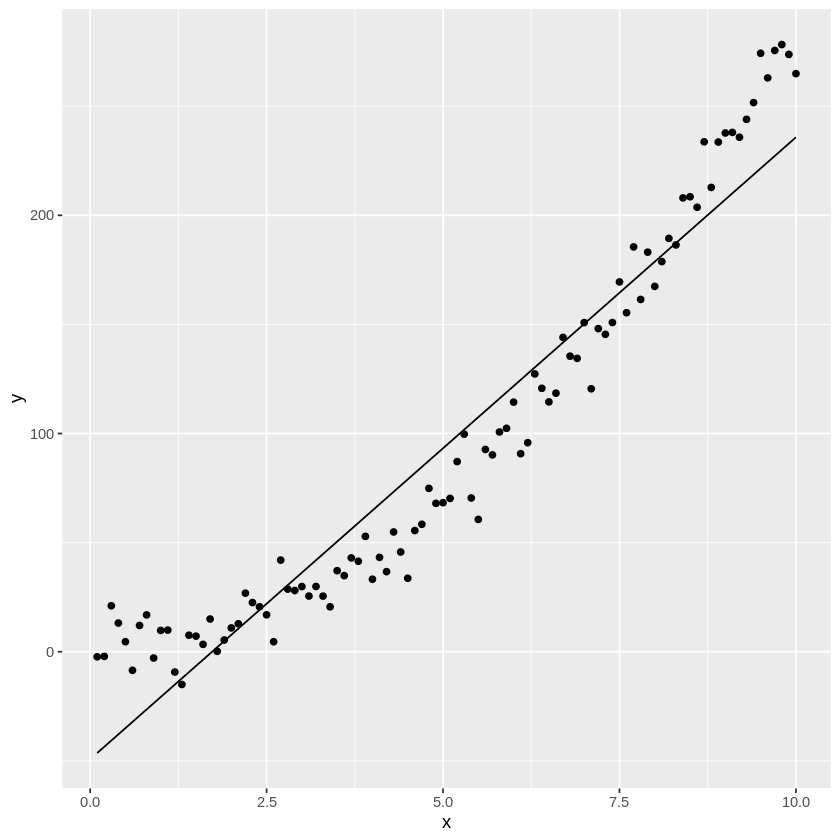

In [60]:
ggplot(df) +
  geom_point(aes(x,y)) +
    geom_line(aes(x, yhat))

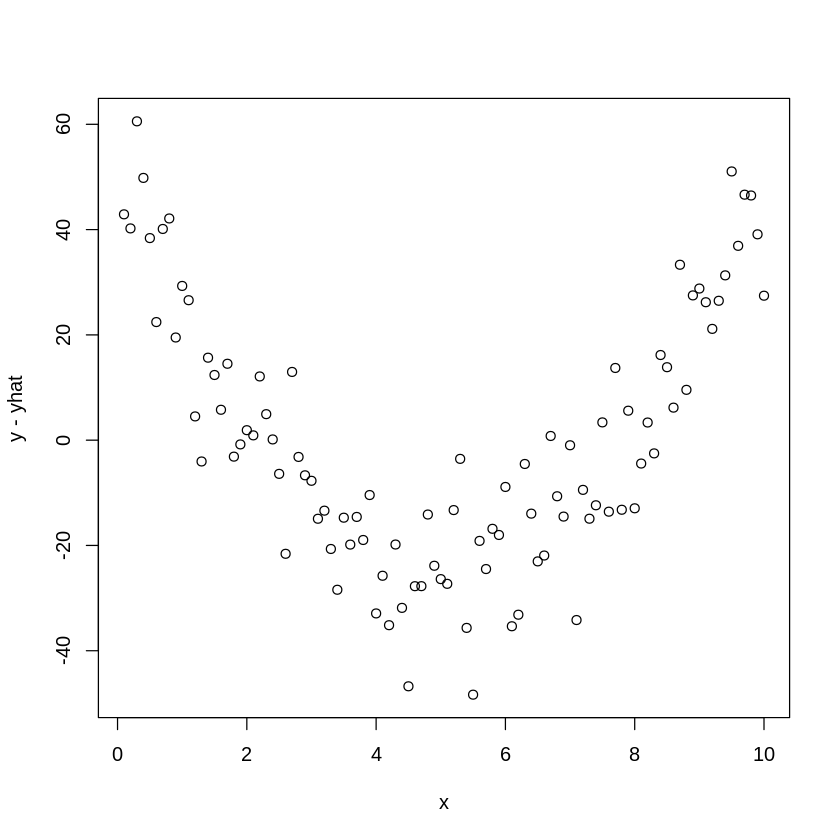

In [33]:
plot(x, y - yhat)

In [57]:
#repeat on five samples
rmses <- c(0,0,0,0,0)
for (i in 1:5){
  xsamp <- sample_n(df,30)
  samp_model <- lm(xsamp$y~xsamp$x)
  yhat <- predict(samp_model, newdata=data.frame(xsamp$x))
  rmses[i] = rmse(xsamp$y, yhat)
}

In [52]:
rmses

[1] 19.65460 24.00476 25.16839 25.04955 24.10870

In [44]:
sample_n(df, 10)

x,y,yhat
<dbl>,<dbl>,<dbl>
0.1,-2.332226,-46.41
6.0,114.360627,121.74
8.8,212.764406,201.54
0.6,-8.519940,-32.16
3.7,42.987461,56.19
1.2,-9.308977,-15.06
1.9,5.361920,4.89
1.1,9.911185,-17.91
2.6,4.572643,24.84


In [ ]:
#try quadratic model
x
poly(df$x, raw = TRUE, degree=2)

In [58]:
#evaluate
rmses <- c(0,0,0,0,0)
for (i in 1:5){
  xsamp <- sample_n(df,30)
  samp_model <- lm(xsamp$y~poly(xsamp$x, 2, raw=TRUE))
  yhat <- predict(samp_model, newdata=data.frame(xsamp$x))
  rmses[i] = rmse(xsamp$y, yhat)
}

In [59]:
#repeat on five samples of the data
rmses

[1]  9.710948  9.560115 10.222708 10.441463  9.120943

In [73]:
rmses <- c(0,0,0,0,0)
for (i in 1:5){
  xsamp <- sample_n(df,30)
  samp_model <- lm(xsamp$y~poly(xsamp$x, 3, raw=TRUE))
  yhat <- predict(samp_model, newdata=data.frame(xsamp$x))
  rmses[i] = rmse(xsamp$y, yhat)
}
rmses

[1] 10.881516  7.746359  9.331185  8.531662  9.505578

In [64]:
rmses <- c(0,0,0,0,0)
for (i in 1:5){
  xsamp <- sample_n(df,30)
  samp_model <- lm(xsamp$y~poly(xsamp$x, 4, raw=TRUE))
  yhat <- predict(samp_model, newdata=data.frame(xsamp$x))
  rmses[i] = rmse(xsamp$y, yhat)
}
rmses

[1] 10.460177  9.897946  8.472993  9.399761  8.861793

In [ ]:
filter(df, !x %in% xsamp$x)

In [ ]:
rmses <- c(0,0,0,0,0)
for (i in 1:5){
  xsamp <- sample_n(df,30)
  samp_model <- lm(xsamp$y~poly(xsamp$x, 4, raw=TRUE))
  yhat <- predict(samp_model, newdata=data.frame(xsamp$x))
  rmses[i] = rmse(xsamp$y, yhat)
}
rmses

In [106]:
## out of sample
colnames(df) <- c("X", "Y", "YHAT")
rmses <- c(0,0,0,0,0)
for (i in 1:5){
  xsamp <- sample_n(df,30)
  xsamp$polyX <- poly(xsamp$X, 2, raw=TRUE)
  print(xsamp)
  out_samp <- filter(df, !X %in% xsamp$X)
  samp_model <- lm(Y ~ polyX.2, data=xsamp)
  new_data = data.frame(out_samp$X)
  yhat <- predict(samp_model, newdata=new_data)
  rmses[i] = rmse(out_samp$Y, yhat)
}
rmses

      X          Y   YHAT polyX.1 polyX.2
1   3.4  20.587342  47.64    3.40   11.56
2   4.8  74.855692  87.54    4.80   23.04
3   3.9  52.857276  61.89    3.90   15.21
4   3.6  34.878208  53.34    3.60   12.96
5   4.3  54.880198  73.29    4.30   18.49
6   0.4  13.153550 -37.86    0.40    0.16
7   2.7  41.974829  27.69    2.70    7.29
8   5.8 100.698248 116.04    5.80   33.64
9   7.3 145.450288 158.79    7.30   53.29
10  0.6  -8.519940 -32.16    0.60    0.36
11  5.7  90.198293 113.19    5.70   32.49
12  9.8 278.238956 230.04    9.80   96.04
13  2.0  10.919847   7.74    2.00    4.00
14  8.0 167.416491 178.74    8.00   64.00
15  1.6   3.376893  -3.66    1.60    2.56
16  2.9  28.049046  33.39    2.90    8.41
17  9.5 274.239189 221.49    9.50   90.25
18  1.3 -15.013048 -12.21    1.30    1.69
19  3.3  25.476633  44.79    3.30   10.89
20  8.4 207.956782 190.14    8.40   70.56
21  6.2  95.802928 127.44    6.20   38.44
22  1.0   9.767499 -20.76    1.00    1.00
23  1.2  -9.308977 -15.06    1.20 

ERROR: ignored

#### Finding the sweet spot

Experiment with degree 1 - 10 on diamonds data to predict price using carat.  What degree complexity is ideal?

#### Bias Variance tradeoff

#### Building Regression Models

- Build simple regression models of different complexity and explore the performance.

- Compare to complex regression models from the `carat` library.  Which models do you prefer and why?

In [112]:
df <- head(diamonds)

In [123]:
rmses <- c(0,0,0,0,0,0,0,0,0,0)
biases <- c(0,0,0,0,0,0,0,0,0,0)
vars <- c(0,0,0,0,0,0,0,0,0,0)
  for (i in 1:10){
    # xsamp <- sample_n(df,30)
    samp_model <- lm(df$price~poly(df$carat, i, raw=TRUE))
    yhat <- predict(samp_model, newdata=data.frame(df$carat))
    rmses[i] = rmse(df$price, yhat)
    biases[i] = mean(abs(yhat - df$price))
    vars[i] = var(yhat)
  }

rmses
biases
vars

Warning message in predict.lm(samp_model, newdata = data.frame(df$carat)):
“prediction from rank-deficient fit; attr(*, "non-estim") has doubtful cases”
Warning message in predict.lm(samp_model, newdata = data.frame(df$carat)):
“prediction from rank-deficient fit; attr(*, "non-estim") has doubtful cases”
Warning message in predict.lm(samp_model, newdata = data.frame(df$carat)):
“prediction from rank-deficient fit; attr(*, "non-estim") has doubtful cases”
Warning message in predict.lm(samp_model, newdata = data.frame(df$carat)):
“prediction from rank-deficient fit; attr(*, "non-estim") has doubtful cases”
Warning message in predict.lm(samp_model, newdata = data.frame(df$carat)):
“prediction from rank-deficient fit; attr(*, "non-estim") has doubtful cases”


[1] 2.9655774 2.6896792 2.6895941 0.2886751 0.2886751 0.2886751 0.2886751
 [8] 0.2886751 0.2886751 0.2886751

[1] 2.1287057 2.1924323 2.1961572 0.1666667 0.1666667 0.1666667 0.1666667
 [8] 0.1666667 0.1666667 0.1666667

[1] 12.51309 14.38542 14.38597 22.96667 22.96667 22.96667 22.96667 22.96667
 [9] 22.96667 22.96667

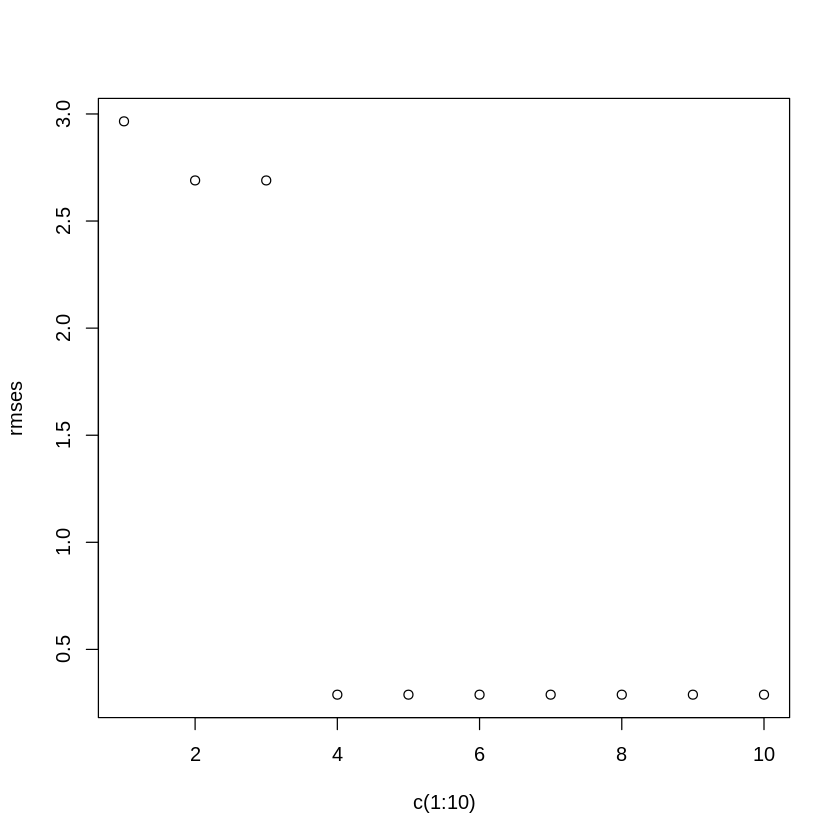

In [119]:
plot(c(1:10), rmses)

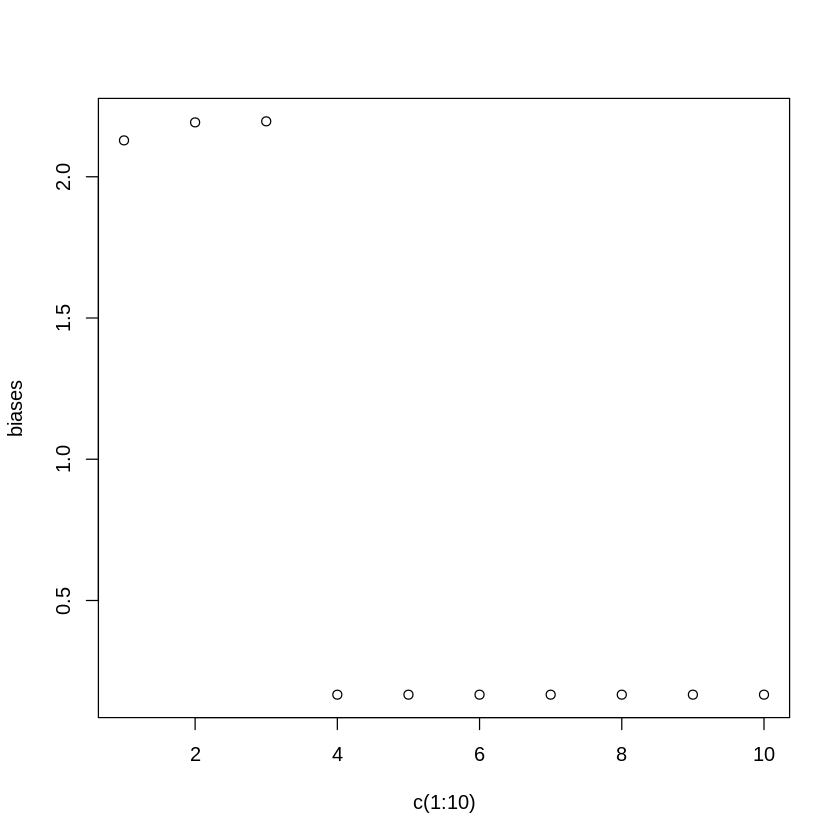

In [120]:
plot(c(1:10), biases)

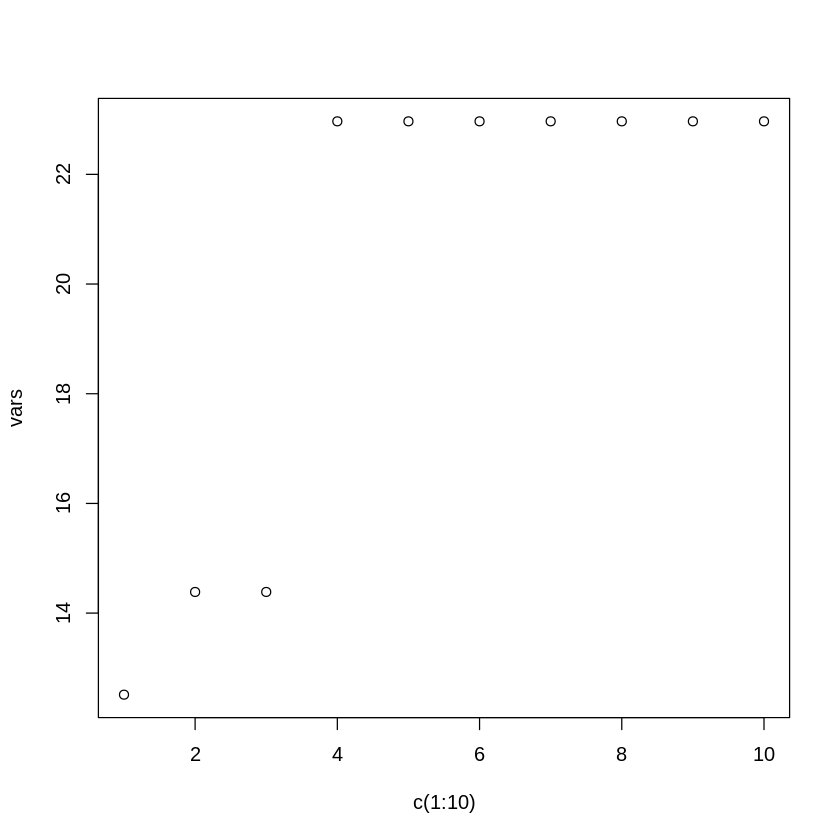

In [122]:
plot(c(1:10), vars)